
## Simulation of an Microresonator Optical Soliton (MOS)
### Thomas Horning
#### PHYS 5070, Spring 2021

I will attempt to simulate the conditions needed to generate an optical soliton and Frequency Comb in a Whispering-Gallery Mode Microresonator. The governing equation for light passing through a nonlinear material is commonly simplified to the nonlinear Schordinger equation. However after applying the appropriate matching conditions for a cavity resonator, this is transformed into the Lugiato-Lefever Equation (LLE). The LLE amounts to a driven, damped, detuned nonlinear Schroedinger equation.

**Goal:** Use NN PDE solutions package to solve the LLE equation for Optical Soliton Microsphere Resonators (OSMR) faster than standard solutions on the fastest langauge. Thereby showing that PDE approximations can be as fast as the fastest code.. I want to quatify the calculation time of both and compare to see if I met my goal.

- Solve the LLE Equation using the given dispersion by the PyLLE Team using PyLLE
- Use Package DeepXDE to solve the LLE Equations
- Compare Results/ Explain differences
- Compare to Analytical solution (Steady-State)
- Reproduce the dispersion profiles to make sub-comb with  NN algorithm
 
  - I will use the same dispersion given by them to train my NN to solve the LLE Equation. I will then generate a couple fake dispersion profiles and make sure they produce the same output. Finally I will time the system..
 
The first paper referenced is the inspiration of this project

I have referenced the following papers:

1. Kovacs, A., “Conditional physics informed neural networks”, <i>arXiv e-prints</i>, 2021.
2. Herr, T.; Brasch, V.; Jost, J.D.; Wang, C.Y.; Kondratiev, N.M.; Gorodetsky, M.L.; Kippenberg, T.J. (2014). "Temporal solitons in optical microresonators". Nature Photonics. 8 (2): 145–152. 
4. Moille G, Li Q, Lu X, Srinivasan K (2019) pyLLE: A Fast and User Friendly Lugiato-Lefever Equation Solver. J Res Natl Inst Stan 124:124012. https://doi.org/10.6028/jres.124.012
5. A. Koryagin, R. Khudorozkov, S. Tsimfer, Pydens: A python framework for solving differential equations with
neural networks, arXiv preprint arXiv:1909.11544 (2019)
6. Lu L,Meng X,Mao Z, and Karniadakis G (2021) DeepXDE: A Deep Learning Library for Solving Differential Equations. SIAM Review 2021 63:1, 208-228

### The Lugiato-Lefever Equation (LLE)

The LLE is a special and highly Complex PDE known for its high complexity and slow calculation times (high computational loads). While some recent numerical methods using the Julia language has drastically increased the speed, it has yet to be seen how advantagous leveraging neural net PDE solutions could be.

The LLE describes the electric field propogating through a medium such that it creates a resonant cavity in the material and the material is nonlinear in the Third order. It includes a driving field and a dampening field to simulate the driving of the system and internal losses.

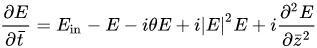


## PyLLE Simulation
#### https://usnistgov.github.io/pyLLE/
##### Created by: - Moille G, Li Q, Lu X, Srinivasan K (2019) pyLLE: A Fast and User Friendly Lugiato-Lefever Equation Solver. J Res Natl Inst Stan 124:124012. https://doi.org/10.6028/jres.124.012

**The following code requires Julia to be downloaded manually. The dependencies should be installed with,**

```conda install -c conda-forge julia```

and

```$ pip install pyLLE```

**Dependencies:**
 - Julia <- manually installed
 
**Python Dependencies**
 - scipy
 - numpy
 - matplotlib
 - h5py
 - prettytable
 - matplotlib
 - ipdb
 
**Julia Dependencies**
 - HDF5
 - FFTW
 - Base
 - LinearAlgebra

**How It Works**

 Using the example data it gives us and the initial parameters, we can simulate a frequency tuning to needed to excite the soliton. We import the Julia-Python communication libraries. The heavy operations are passed to Julia, "The Julia language provides an efficient computational interface with BLAS (basic linear algebra subprograms), enabling reuse of the same Fast
Fourier Transform plan". This means that the PyLLE Julia Backend is already using a human derived algorithm that is commonly included in most math libraries such as Numpy. The data is passed to Julia because Julia's BLAS provides much faster linear computing than competing languages, including Python.

 The code below takes in an input CSV file of resonant mode numbers comma seperated by the dispersion associated with that mode for an optical micro-ring resonator. It takes User-input initial conditions for the resonantor system and structures these inputs with the dispersion profile using H5py which allows us to pass data from Python to Julia. HDpy also calls Julia and runs the program. Julia then uses its FFT solvers and repackages the data using HDF5 and sends the data back to python structured in a class. This class also has internal functions for plotting the data.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pyLLE as PyL


In [8]:

#This structure holds the input data for the physical resonator along with simulated dispersion profile
res = {'R': 23e-6, # ring radius in meters
       'Qi': 1e6,  # Intrinsic Q factor
       'Qc': 1e6,  # Coupled Q factor
       'γ': 1.55,  # Non-linear coefficient at the pump frequency
       'dispfile': 'TestDispersion.csv', #  previously
      } 

# This structure holds the simulation parameters, initial conditions and step sizes
sim = {'Pin': 150e-3, # Input power in Q
       'Tscan': 1e6,  # Length of the simulation in unit of round trip 
       'f_pmp': 191e12, # Pump Frequency 
       'δω_init': 2e9*2*np.pi, # Initial detuning of the pump in rad/s 
       'δω_end': -8e9*2*np.pi,  # End detunin of the pump in rad/s
       'μ_sim': [-74,170],  # azimuthal mode to simulate on the left and right side of the pump
       'μ_fit': [-71, 180], # azimuthal mode to fit the dispersion on the left and right side of the pump
        }


In [9]:
# --  Setup thte Solver --
# Initialize Solver
solver = PyL.LLEsolver(sim=sim,res=res)

#Analyze Dispersion profile
solver.Analyze(plot=True,plottype='all')

#Structure for sending to Julia
solver.Setup()


-- Dispersion Analysis --
	Pump index: 72
	Center Pump: 190.523 THz
	FSR: 1006.36 GHz
	D2: 24.58 MHz

-- Solving standard LLE --
	Simulation Parameters
		R = 23.00 µm
		Qi = 1.00 M
		Qc = 1.00 M
		γ = 1.55 
	Simulation Parameters
		Pin = 150.00 mW
		Tscan = 1.00 x1e6 Round Trip
		f_pmp = 191.00 THz
		δω_init = 2.00 x2π GHz
		δω_end = -8.00 x2π GHz
		μ_sim = [-74.00,170.00] 
		μ_fit = [-71.00,180.00] 



In [ ]:
# --  Solve the Temporal LLE --
import time
tic = time.time()

solver.SolveTemporal()

toc = time.time()
calctime = toc - tic
print('Calculation time of %f minutes and %f seconds' % (calctime%60, calctime-(calctime%60)))

# retrieve the data from Julia
solver.RetrieveData()
      
solver.sol.keys() # Print the key values for the return data

# Various plots
Var3 = solver.PlotCombPower()
ind = 570
Var2 = solver.PlotCombSpectra(ind)
Var1 = solver.PlotSolitonTime(ind)

----------------------------------------------------------------------
2021-05-07 01:25:27
Launching Julia....
Temp file can be found in: C:\Users\Thomas\AppData\Local\Temp\tmpe2xa1minlog.log
Launching Julia: Done
Computing LLE [*                                                 ] 3%

From this we can see that the linear solution of this equation takes multiple minutes, or rather large computation time even on a programming language designed for BLAS. In the following section, we will choose an appropriate Neural Network Framework to solve our complex PDE.

## Solving the LLE using Neural Network approximations

**PyDEns vs DeepXDE**

PyDEns is a python package built to provide a cleaner interface for the solving of a large variety of ODEs and PDEs. It uses to DeepGalerkin and a front end designed to make inputting the equations easier.

DeepXDE on the other hand realies more heavily on the Tensorflow framework. However, it allows complex domain geometries without wasteful meshing. Geometeries can be constructed as constructive solid geometry (CSG) using boolean operations and basic shapes: union, difference, and intersection. This allows for more robust boundary matching and slightly finer resolution.

Unfortunately after days of searching and reading, it does not look like their are any developed neural net based packages that are able to handle the LLE nonlinear Schrodinger equation without some major reworks. DeepXDE has functionality for nonlinearity and eigenvalue solutions, but the overall methodology is not well documented and out-scoped me. I am ultimately moving forward with DeepXDE because it is the most up-to-date and least deprecated of the two. 

**Instead I hope you except this solution to a double pendulum using basic numerical methods versus DeepXDE**

### DeepXDE
#### https://github.com/lululxvi/deepxde
##### Lu L,Meng X,Mao Z, and Karniadakis G (2021) DeepXDE: A Deep Learning Library for Solving Differential Equations. SIAM Review 2021 63:1, 208-228

```$ conda create --name p36 python=3.6```

```$ conda activate p36```

```$ pip install tensorflow==1.15```

``` conda install -c conda-forge deepxde```

**Dependencies**
- Matplotlib
- NumPy
- SALib
- scikit-learn
- SciPy
- TensorFlow>=2.2.0


## Double Pendulum
After some Lagrangian Mechanics, we arrive at the coupled ODEs


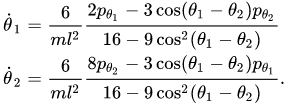
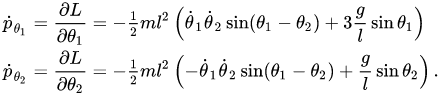

These can only be solved numerically. Typically using the Runga-Kutte method. I implement a runge-kutte integration after the Neural Net solution and time it to compare to the neural net approach.

### Runga-Kutte Integration

In [ ]:


import sys
import numpy as np
from scipy.integrate import odeint
import numpy
import time
import matplotlib.pyplot as plt

def DoublePen(y,t):   
    l1=0.5; l2=1 ; m1=1 ; m2=1; g=9.81;
    dY= np.zeros(4)
    a = (m1+m2)*l1
    b = m2*l2*np.cos(y[0]-y[2])
    c = m2*l1*np.cos(y[0]-y[2])
    d = m2*l2
    e = -m2*l2*y[3]* y[3]*np.sin(y[0]-y[2])-g*(m1+m2)*np.sin(y[0])
    f = m2*l1*y[1]*y[1]*np.sin(y[0]-y[2])-m2*g*np.sin(y[2])
    dY[0] = y[1]
    dY[2] = y[3]
    dY[1] = (e*d-b*f)/(a*d-c*b)
    dY[3] = (a*f-c*e)/(a*d-c*b)
    return dY


tmax, dt = 10, 0.01
t = np.arange(0, tmax+dt, dt)

y0 = [np.pi/2,0,np.pi/2,0] # my favorite initial conditions, straight sideways

tic = time.time() #Timer on

y = odeint(DoublePen, y0, t)

#Display Timing
toc = time.time()# Timer off
calctime = toc - tic
print('Calculation time of %f minutes or %f seconds' % ((calctime%60), calctime))

# Comparing Oscillations
plt.figure()
plt.plot(t,y[:, 0],t,y[:, 2])
plt.xlabel("time (s)")
plt.ylabel("Theta (rads)")
plt.title("Angle over time of both pendulums")
plt.legend(["Inner Pendulum","Outer Pendulum"])
plt.show()

# Comparing Phase Spaces
plt.figure()
plt.plot(y[:, 0],y[:, 1],y[:, 2],y[:, 3])
plt.xlabel("Theta")
plt.ylabel("Theta-dot")
plt.title("Phase-space")
plt.legend(["Inner Pendulum","Outer Pendulum"])
plt.show()



### Neural Net Solution
I have attempted to use both DeepXDE and PyDEns, having utilities and syntax useful in differing capacities. ultimately I went with DeepXDE because I felt it was the simpliest to turn my specific equations into something solvable. Unfortuenately  I was not able to get the model to train. I can successfully build and start it, but I am getting matrix issues I don't understand.




In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from scipy.integrate import odeint
import deepxde as dde


def PenSim(theta1, theta2, w1, w2 ,t):
    
    theta1dot = (w1-w2*np.cos(theta1 - theta2))/(1+(np.sin(theta1-theta2)**2))
    theta2dot = ((2*w2-w1*np.cos(theta1 - theta2))/(1+(np.sin(theta1-theta2)**2)))
    w1dot = -2*9.8*np.sin(theta1) - ((w1*w2*np.sin(theta1 - theta2))/(1+(np.sin(theta1-theta2)**2))) + ((w1**2+2*w2**2 - w1*w2np.cos(theta1 - theta2))/(2*(1+(np.sin(theta1-theta2)**2)**2)))*np.sin(2*(theta-theta2))
    w2dot = -9.8*np.sin(theta2) - ((w1*w2*np.sin(theta1 - theta2))/(1+(np.sin(theta1-theta2)**2))) + ((w1**2+2*w2**2 - w1*w2np.cos(theta1 - theta2))/(2*(1+(np.sin(theta1-theta2)**2)**2)))*np.sin(2*(theta-theta2))
    
    th1dot = dde.grad.jacobian(y, t, i=0)
    th2dot = dde.grad.jacobian(y, t, i=1)
    w1_dot = dde.grad.jacobian(y, t, i=2)
    w2_dot = dde.grad.jacobian(y, t, i=3)

    return [th1dot - theta1dot, th2dot - theta2dot, w1_dot - w1dot,  w2_dot - w2dot ]


def boundary(_, on_initial):
    return on_initial




geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.IC(geom, np.pi/2, boundary, component=0)
ic2 = dde.IC(geom, np.pi/2, boundary, component=1)
ic3 = dde.IC(geom, 0, boundary, component=2)
ic4 = dde.IC(geom, 0, boundary, component=3)
data = dde.data.PDE(geom, PenSim, [ic1, ic2, ic3, ic4], num_domain = 500, num_boundary= 1000)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)
